$\Large\textbf{Lab 1. Exercise 2. }$

Now we will consider a slightly different algorithm which can be used to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

$\textbf{[R]}$ Write the function $f(\mathbf{x})$ in the form $\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{x}\in {\mathbb{R}}^2$, $\mathbf{A}$ is a symmetric matrix of size $2 \times 2$, $\mathbf{b}\in{\mathbb{R}}^2$ and $c\in\mathbb{R}$. 



In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [8]:
def evalf2(x):
  assert A.shape==(2,2) and type(A) is ndarray and len(b)==2 and type(b) is ndarray and len(x)==2 and type(x) is ndarray
  return np.dot(x.transpose,(np.dot(A,x)))+2*np.dot(b.transpose(),x)+c

$\large \textbf{ANSWER:}$ Write your answer here:

$f(x_1,x_2)=\begin{bmatrix} 
	x_1 & x_2 \\
	\end{bmatrix}
\begin{bmatrix} 
	1 & 0  \\
	0 & 1 \\
	\end{bmatrix}
  \begin{bmatrix} 
	x_1 \\
	x_2 \\
	\end{bmatrix}
  + 2*
  \begin{bmatrix} 
	100 & -25 \\
	\end{bmatrix}
  \begin{bmatrix} 
	x_1 \\
	x_2 \\
	\end{bmatrix}
  +10625$


$\textbf{[R]}$ It turns out that for a function $f:{\mathbb{R}}^n\rightarrow \mathbb{R}$ of the form $f(\mathbf{x})=\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{A}\in{\mathbb{R}}^{n \times n}$ is a symmetric matrix, $\mathbf{b} \in {\mathbb{R}}^n$ and $c\in \mathbb{R}$, the analytical solution to $\min_{\alpha \geq 0} f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$ can be found in closed form. Find the solution. 

$\large \textbf{ANSWER:}$
Write your answer here:
 Given that $f(\mathbf{x})=\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$ \\
we can find $\nabla f(\mathbf{x}) = 2\mathbf{A} \mathbf{x}+2 \mathbf{b} ----(1) $ \\
Since we are to minimize  $f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))=g(\alpha) \   \text{with respect to } \alpha .  \\
\text{By calculas we want to minimize} \ g(\alpha) so 
\\ \frac{δg}{δα} = [\nabla f(x-\alpha\nabla f(\mathbf{x}))]^\top[-\nabla f(\mathbf{x})]   \\
\text{By Fermat's theorem, necessary condition for optimality is:} \\
 \frac{δg}{δα}=0
 ⇒ \  [\nabla f(x-\alpha\nabla f(\mathbf{x}))]^\top[-\nabla f(\mathbf{x})]=0 \\ 
⇒ [-\nabla f(\mathbf{x})]^\top[\nabla f(x-\alpha\nabla f(\mathbf{x}))]=0  \ \ (\text{taking transpose of both sides} )\\
 ⇒[-\nabla f(\mathbf{x})]^\top[2\mathbf{A}(\mathbf{x-α\nabla}f(\mathbf{x})+2b]=0 \ \  \text{By Equation (1)}  \\ ⇒α= \frac{[\nabla f(\mathbf{x})]^⊤[\mathbf{A}\mathbf{x}+\mathbf{b}]}{[\nabla f(\mathbf{x})]^⊤\mathbf{A}\nabla f(\mathbf{x})} \\
 ⇒ α = \frac{[\nabla f(\mathbf{x})]^⊤\nabla f(\mathbf{x})}{\mathbf{2}[\nabla f(\mathbf{x})]^⊤\mathbf{A} \nabla f(\mathbf{x})} $

We will use this idea to construct a suitable step length finding procedure for our modified algorithm given below: 


\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

In [9]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [10]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [11]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [12]:
A=np.array([1,0,0,1]).reshape((2,2))
b=np.array([100,-25]).reshape((2,1))

In [14]:
#Complete the module to compute the steplength
def compute_steplength(x,A): #add appropriate arguments to the function
  numerator=np.dot(evalg(x).transpose(),evalg(x))    
  denominator=2*np.dot(np.dot(evalg(x).transpose(),A),evalg(x))
  step_length=numerator/denominator
   
  return step_length

In [15]:
def find_minimizer(start_x, tol):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  k = 0
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    step_length = compute_steplength(x,A) #call the new function you wrote to compute the steplength
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  print(k) 
  return x 


In [16]:
my_start_x = np.array([10,10])
my_tol= 1e-3
find_minimizer(my_start_x, my_tol)

iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0
1


array([-100.,   25.])

$\large \textbf{[R]}$ With starting point $x_0 = (10, 10)$ and the new module to compute $η^k$
, try $τ = 10^{−p}$ where p = 1, 2, . . . , 10.
For each τ , record the number of iterations taken by the algorithm to terminate. \\
Prepare a plot where the number of iterations is plotted against τ values. \\
 Compare and contrast the plot with the plots obtained in
Exercise 1 with fixed step length values.


In [20]:
def find_minimizer_1(start_x, tol):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  k =0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    step_length = compute_steplength(x,A) #call the new function you wrote to compute the steplength
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k=k+1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  print(k)
  return x,k

In [21]:
tol_values=[]
iterations=[]
for p in range(1,11):
  my_start_x = np.array([10,10])
  my_tol= (10)**(-p)
  print('when tol is',my_tol)
  tol_values.append(my_tol)
  minimizer,number_of_iterations=find_minimizer_1(my_start_x, my_tol)
  print('minimizer is:',minimizer)
  print('number_of_iterations',number_of_iterations)
  iterations.append(number_of_iterations)
print(tol_values)
print(iterations)  

when tol is 0.1
1
minimizer is: [-100.   25.]
number_of_iterations 1
when tol is 0.01
1
minimizer is: [-100.   25.]
number_of_iterations 1
when tol is 0.001
1
minimizer is: [-100.   25.]
number_of_iterations 1
when tol is 0.0001
1
minimizer is: [-100.   25.]
number_of_iterations 1
when tol is 1e-05
1
minimizer is: [-100.   25.]
number_of_iterations 1
when tol is 1e-06
1
minimizer is: [-100.   25.]
number_of_iterations 1
when tol is 1e-07
1
minimizer is: [-100.   25.]
number_of_iterations 1
when tol is 1e-08
1
minimizer is: [-100.   25.]
number_of_iterations 1
when tol is 1e-09
1
minimizer is: [-100.   25.]
number_of_iterations 1
when tol is 1e-10
1
minimizer is: [-100.   25.]
number_of_iterations 1
[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


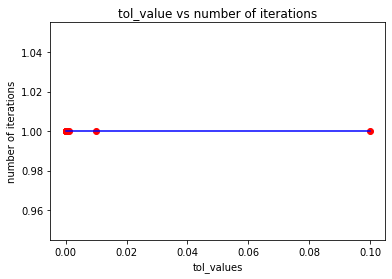

In [22]:
plt.plot(tol_values,iterations,color='b')
plt.scatter(tol_values,iterations,color='r')
plt.title('tol_value vs number of iterations')
plt.xlabel('tol_values')
plt.ylabel('number of iterations')
plt.show()

$\large \textbf{ANSWER:}$ As we can see in above plot that number of iterations does not depend on tolerance value when we use Gradient Descent Procedure with line search to compute step length but in excercise 1 we were fixing step length 0.1 and due to that number of iterations were depending over tolerance values and number of iterations were increasing very fast when tolerance value decreases. SO we can conclude that Gradient Descent Procedure with line search to compute step length is better then Gradient Descent Procedure with constant step length.  